In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, classification_report

In [2]:
glass_data = pd.read_csv("D:\Amir Ali\Data Science\Datasets projects\dataset3-main\glass.csv")
glass_data

,A,B,C,D,E,F,G,H,I,J,K
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
columns_name = [ "Id number", "RI: refractive index", "Na", "Mg","Al","Si","K","Ca","Ba","Fe","Type of glass"]
glass_data.columns = columns_name

In [4]:
glass_data.head()

,Id number,RI: refractive index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id number             214 non-null    int64  
 1   RI: refractive index  214 non-null    float64
 2   Na                    214 non-null    float64
 3   Mg                    214 non-null    float64
 4   Al                    214 non-null    float64
 5   Si                    214 non-null    float64
 6   K                     214 non-null    float64
 7   Ca                    214 non-null    float64
 8   Ba                    214 non-null    float64
 9   Fe                    214 non-null    float64
 10  Type of glass         214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [6]:
glass_data.describe()

,Id number,RI: refractive index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# Lets perform some EDA

<AxesSubplot:>

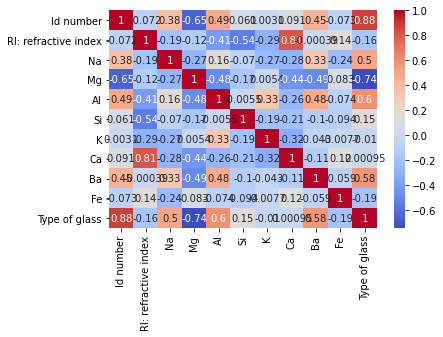

In [7]:
#lets find correlation of data

corr = glass_data.corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm')


In [8]:
#As i dont see Id number adding any atribute to the data I going to drop it.
glass_data.drop('Id number', axis = 1, inplace = True)

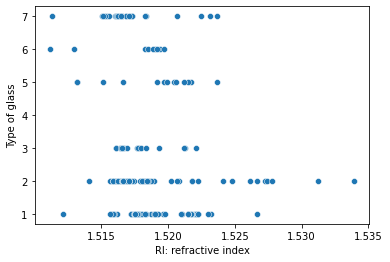

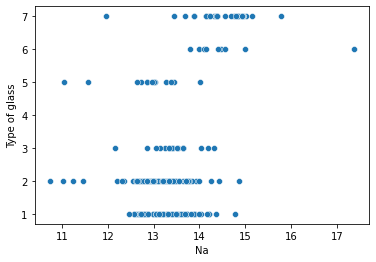

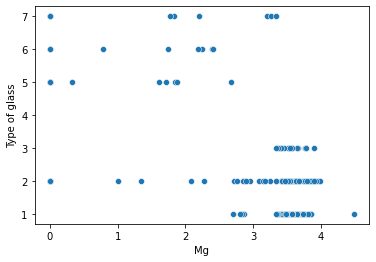

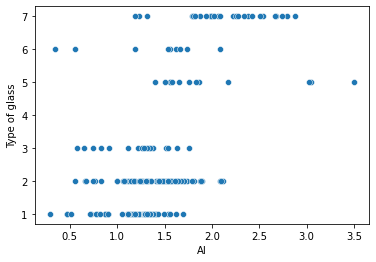

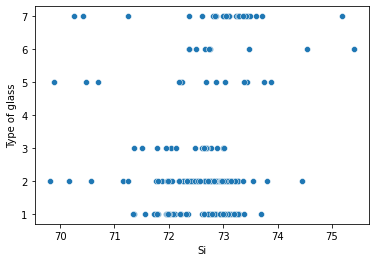

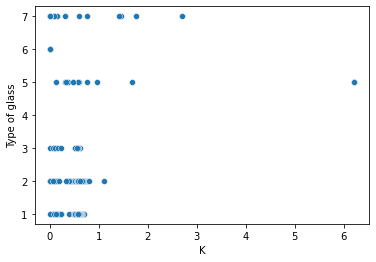

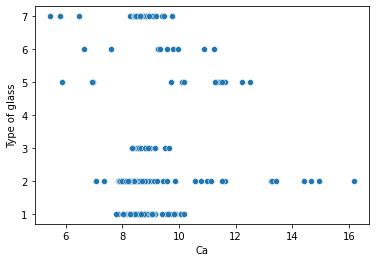

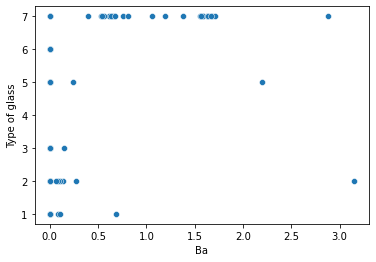

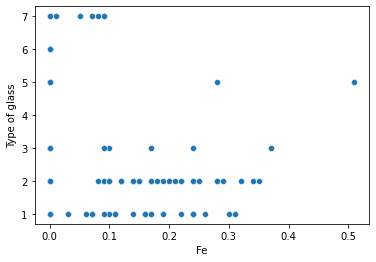

In [9]:
#lets try to find correlation of each independent column to dependent column using scatter plots


sns.scatterplot(x = 'RI: refractive index', y = 'Type of glass', data = glass_data)
plt.show()

sns.scatterplot(x = 'Na', y = 'Type of glass', data = glass_data)
plt.show()

sns.scatterplot(x = 'Mg', y = 'Type of glass', data = glass_data)
plt.show()

sns.scatterplot(x = 'Al', y = 'Type of glass', data = glass_data)
plt.show()

sns.scatterplot(x = 'Si', y = 'Type of glass', data = glass_data)
plt.show()

sns.scatterplot(x = 'K', y = 'Type of glass', data = glass_data)
plt.show()

sns.scatterplot(x = 'Ca', y = 'Type of glass', data = glass_data)
plt.show()

sns.scatterplot(x = 'Ba', y = 'Type of glass', data = glass_data)
plt.show()

sns.scatterplot(x = 'Fe', y = 'Type of glass', data = glass_data)
plt.show()


In [10]:
glass_data.groupby('Type of glass').count()

,RI: refractive index,Na,Mg,Al,Si,K,Ca,Ba,Fe
Type of glass,,,,,,,,,
1,70,70,70,70,70,70,70,70,70
2,76,76,76,76,76,76,76,76,76
3,17,17,17,17,17,17,17,17,17
5,13,13,13,13,13,13,13,13,13
6,9,9,9,9,9,9,9,9,9
7,29,29,29,29,29,29,29,29,29


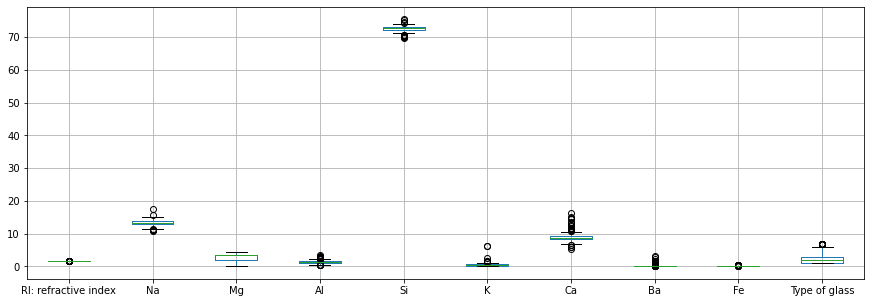

In [11]:
glass_data.boxplot(figsize = (15,5))
plt.show()

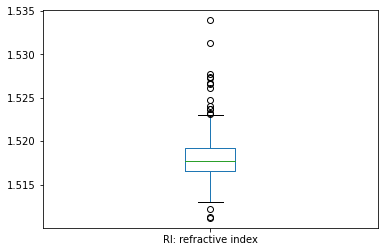

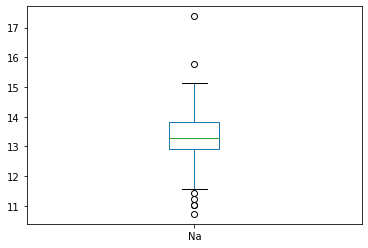

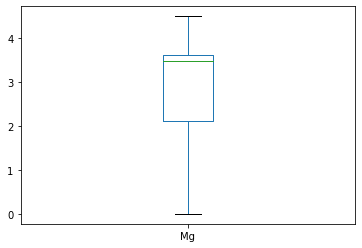

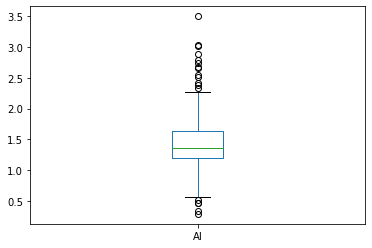

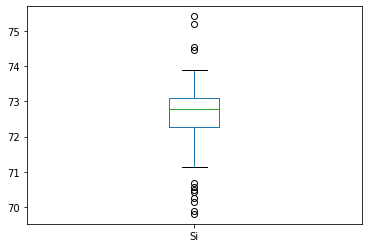

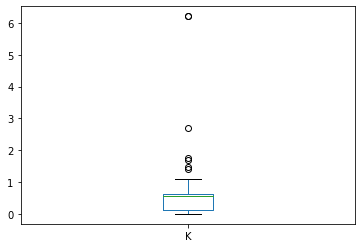

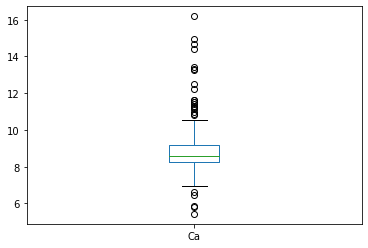

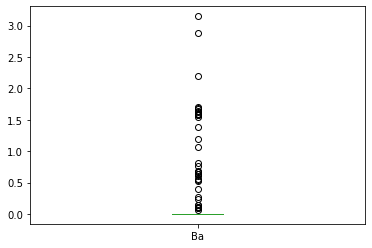

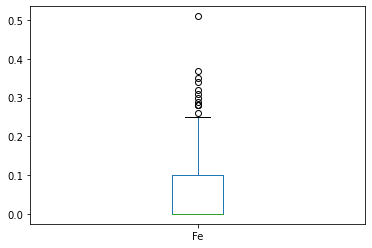

In [12]:
glass_data['RI: refractive index'].plot(kind = 'box')
plt.show()

glass_data['Na'].plot(kind = 'box')
plt.show()

glass_data['Mg'].plot(kind = 'box')
plt.show()

glass_data['Al'].plot(kind = 'box')
plt.show()

glass_data['Si'].plot(kind = 'box')
plt.show()

glass_data['K'].plot(kind = 'box')
plt.show()

glass_data['Ca'].plot(kind = 'box')
plt.show()

glass_data['Ba'].plot(kind = 'box')
plt.show()

glass_data['Fe'].plot(kind = 'box')
plt.show()

In [13]:
print(glass_data.skew())

RI: refractive index    1.625431
Na                      0.454181
Mg                     -1.152559
Al                      0.907290
Si                     -0.730447
K                       6.551648
Ca                      2.047054
Ba                      3.416425
Fe                      1.754327
Type of glass           1.114915
dtype: float64


Lets try to remove the skewness of the data

In [14]:
from scipy.stats import boxcox

In [15]:
# Lets divide the data into independent and dependent variable
X = glass_data.iloc[:,0:-1]
Y = glass_data.iloc[:,-1]
print(X.shape)
print(Y.shape)

(214, 9)
(214,)


In [16]:
# Lets split data into test and train

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = .25, random_state = 30)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(160, 9)
(54, 9)
(160,)
(54,)


In [17]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# print(sc.mean_)
# print(sc.transform(X_train))
# print(sc.transform(X_test))

In [18]:
#Lets import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [19]:
#Linear Regression
lr = LinearRegression() # instance
lr.fit(X_train, Y_train)
lr_pred = lr.predict(X_test)
lr_score = lr.score(X_test, Y_test)
print('Linear Regression Score : ', lr_score)


#Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, Y_train)
dt_pred = dt.predict(X_test)
dt_score = dt.score(X_test, Y_test)
print('Decision Tree Score : ',dt_score)

# KNeighbors Regressor
knn = KNeighborsRegressor()
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)
knn_score = knn.score(X_test, Y_test)
print('KNeighbors Regressor : ', knn_score)

Linear Regression Score :  0.6118136449386625
Decision Tree Score :  0.42634560906515573
KNeighbors Regressor :  0.6473087818696883


# Modle Evaluation

Lets use evaluation metrics like Mean_Square_error, Mean_absolute_error, RMSE

Libraries already imported

In [20]:
# Linear Regression
print('Linear Regression')

print('Mean Squared Error : ', mean_squared_error(Y_test, lr_pred))
print('Mean Absolute Error : ', mean_absolute_error(Y_test, lr_pred))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(Y_test, lr_pred)))
print('R2 Score : ', r2_score(Y_test, lr_pred))


Linear Regression
Mean Squared Error :  1.6917257202055818
Mean Absolute Error :  0.9270461553399327
Root Mean Squared Error :  1.3006635691851993
R2 Score :  0.6118136449386625


In [21]:
#Decision Tree Regressor

print('Decision Tree Regressor')
print('Mean Squared Error : ', mean_squared_error(Y_test, dt_pred))
print('Mean Absolute Error : ', mean_absolute_error(Y_test, dt_pred))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(Y_test, dt_pred)))
print('R2 Score : ', r2_score(Y_test, dt_pred))
# print('Classification report', classification_report(Y_test,dt_pred))

Decision Tree Regressor
Mean Squared Error :  2.5
Mean Absolute Error :  0.7592592592592593
Root Mean Squared Error :  1.5811388300841898
R2 Score :  0.42634560906515573


In [22]:
#KNeighbors Regressor
print('KNeighbors Regressor')
print('Mean Squared Error : ', mean_squared_error(Y_test, knn_pred))
print('Mean Absolute Error : ', mean_absolute_error(Y_test, knn_pred))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(Y_test, knn_pred)))
print('R2 Score : ', r2_score(Y_test, knn_pred))


KNeighbors Regressor
Mean Squared Error :  1.537037037037037
Mean Absolute Error :  0.7888888888888889
Root Mean Squared Error :  1.239772978023411
R2 Score :  0.6473087818696883


# Model Tuning

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

#lets create and fit Ridge Regression model testing each alpha
alphavalue = {'alpha':[1,0.1,0.01,0.001,0.0001,0]}
model = Ridge()

grid = GridSearchCV(estimator = model, param_grid = alphavalue)

grid.fit(X_train, Y_train)
print(grid)

#lets summarize the results of the grid search

print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]})
0.7350492320948231
1
{'alpha': 1}


In [24]:
rd = Ridge(alpha = 0.1)
rd.fit(X_train,Y_train)
print(rd.coef_)
print('Score: ',rd.score(X_train, Y_train))

[-0.08769049  0.57616932 -1.0090974   0.38625746  0.187203    0.03925721
  0.01130687  0.32274425 -0.0568621 ]
Score:  0.7801858150021121


In [25]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')  

knn_params = {"n_neighbors": np.arange(1, 50)}
knn_cv_model = GridSearchCV(knn, knn_params, cv=5, n_jobs=-1, verbose=2)
knn_cv_model.fit(X_train, Y_train)
print("Best Parameters: " + str(knn_cv_model.best_params_))

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.8s


Best Parameters: {'n_neighbors': 2}


[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed:   10.4s finished


In [26]:
#Model Testing
knn_tuned = KNeighborsRegressor(n_neighbors=2)
knn_tuned.fit(X_train, Y_train)
knn_tuned_pred = knn_tuned.predict(X_test)
print('KNeighborsRegressor Tuned')
print('Mean Squared Error:', mean_squared_error(Y_test, knn_tuned_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, knn_tuned_pred)))
print('Mean Absolute Error:', mean_absolute_error(Y_test, knn_tuned_pred))
print('R2 Score:', r2_score(Y_test, knn_tuned_pred))

KNeighborsRegressor Tuned
Mean Squared Error: 1.75
Root Mean Squared Error: 1.3228756555322954
Mean Absolute Error: 0.6851851851851852
R2 Score: 0.5984419263456091


1- building_windows_float_processed
2- building_windows_non_float_processed
3- vehicle_windows_float_processed
4- vehicle_windows_non_float_processed (none in this database)
5- containers
6- tableware
7- headlamps

In [27]:
glass_data.sample(1)

,RI: refractive index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
110,1.52664,11.23,0.0,0.77,73.21,0.0,14.68,0.0,0.0,2


In [28]:
def glasspredict_knns(p):
    p = p.reshape(1,-1)
    knn_pred = knn.predict(p)
    knn_pred = np.round_(knn_pred)
    if knn_pred == 1 and knn_pred < 2:
        print("building_windows_float_processed")
    elif knn_pred == 2 and knn_pred < 3:   
        print("building_windows_non_float_processed")
    elif knn_pred == 3 and knn_pred < 4:
        print("vehicle_windows_float_processed")
    elif knn_pred == 4 and knn_pred < 5:
        print("vehicle_windows_non_float_processed")
    elif knn_pred == 5 and knn_pred < 6:
        print("containers")
    elif knn_pred == 6 and knn_pred < 7:
        print("tableware")
    elif knn_pred == 7:
        print("headlamps")
    else:
        print(knn_pred,"Model not working fine")
        
p = np.array([1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0])
glasspredict_knns(p)

tableware


It was nice learning!

# Thanks & Best Regards!!